# Line Plots: An Overview

Line plots are a type of graph used to display information as a series of data points connected by straight line segments. They are typically used to visualize data trends over intervals of time or any other continuous variable.

## Utility:
1. **Trend Analysis**: Line plots are particularly effective for showing trends over time. They help in identifying patterns such as increases, decreases, or cyclic behavior.
2. **Comparative Analysis**: They allow for the comparison of multiple data sets on the same graph, making it easy to compare trends between different groups or variables.
3. **Predictive Analysis**: By observing past trends, line plots can be used to make predictions about future data points.
4. **Simple Visualization**: Line plots offer a straightforward and easy-to-understand visualization of data, making them accessible to a broad audience.

## When to Use Line Plots:
1. **Time-Series Data**: When you need to show how data points change over time, such as stock prices, weather patterns, or sales figures.
2. **Continuous Data**: When dealing with continuous data where you want to show the relationship between two variables.
3. **Comparisons**: When comparing multiple data sets to show their trends and relationships over the same period or range.
4. **Highlighting Specific Data Points**: When it’s important to highlight individual data points or specific trends within a continuous data set.

## Pitfalls of Using Line Plots:
1. **Overlapping Lines**: When comparing multiple data sets, lines may overlap, making it difficult to distinguish between them.
2. **Misleading Trends**: Inappropriate scaling or intervals can mislead the viewer, exaggerating or minimizing trends.
3. **Clutter**: Including too many data sets in one plot can clutter the graph, reducing its readability.
4. **Interpolation Misinterpretation**: Viewers might mistakenly interpret the lines as indicating continuous data when they are only connecting discrete data points.
5. **Limited Use for Non-Continuous Data**: Line plots are less effective for categorical or non-continuous data, where other types of graphs (like bar charts or pie charts) might be more appropriate.

In [296]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Importing data
data = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/dengue-dataset.csv"
df = pd.read_csv(data, index_col='data',parse_dates=True)

df.head()

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
data,,,,,
1998-01-01,237,179.2,25.7,20.2,28.1
1998-02-01,331,226.3,25.1,20.0,28.0
1998-03-01,562,149.1,24.8,22.4,27.2
1998-04-01,187,46.4,22.7,18.1,26.0
1998-05-01,32,88.3,19.2,15.7,22.9


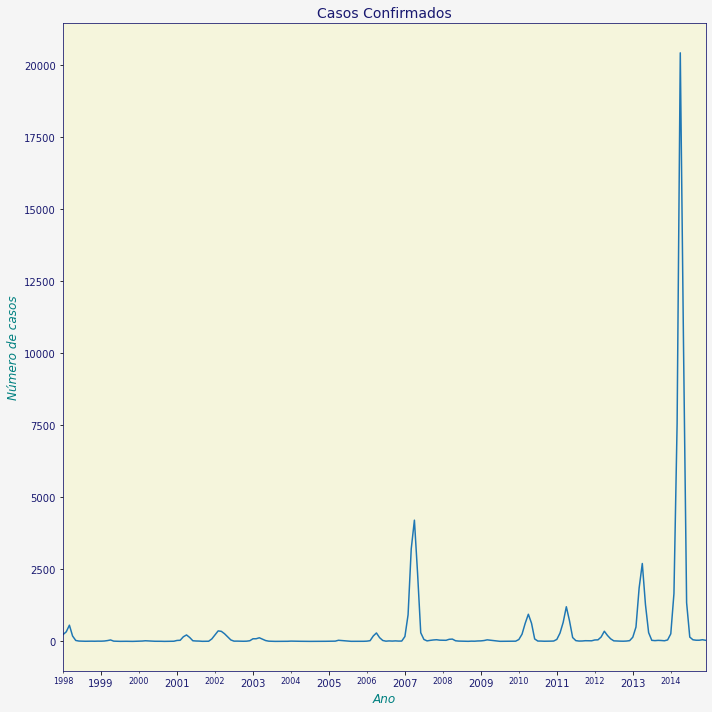

In [297]:
fig, ax1 = plt.subplots(
    figsize=(10,10),
    dpi=72
)

fig.set(tight_layout=True,
        facecolor='whitesmoke'
        )

df['casos-confirmados'].plot(kind='line',ax=ax1)

year_ticks = df.index.strftime('%Y').unique()
ax1.set_xticks(year_ticks,minor=True)
ax1.set_xticklabels(year_ticks,minor=True)

ax1.tick_params(
    which='minor',
    labelsize=8,
    labelcolor='midnightblue'
    )
ax1.tick_params(
    which='major',
    labelsize=10,
    labelcolor='midnightblue'
    )

ax1.spines[['top','bottom','left','right']].set(color='midnightblue')

ax1.set_title(
    "Casos Confirmados",
    color='midnightblue',
    fontsize=14
    )

ax1.set_xlabel(
    "Ano",
    color='teal',
    fontstyle='italic',
    fontsize=12
    )

ax1.set_ylabel(
    "Número de casos",
    color='teal',
    fontstyle='italic',
    fontsize=12
    )

ax1.set_facecolor(color='beige')

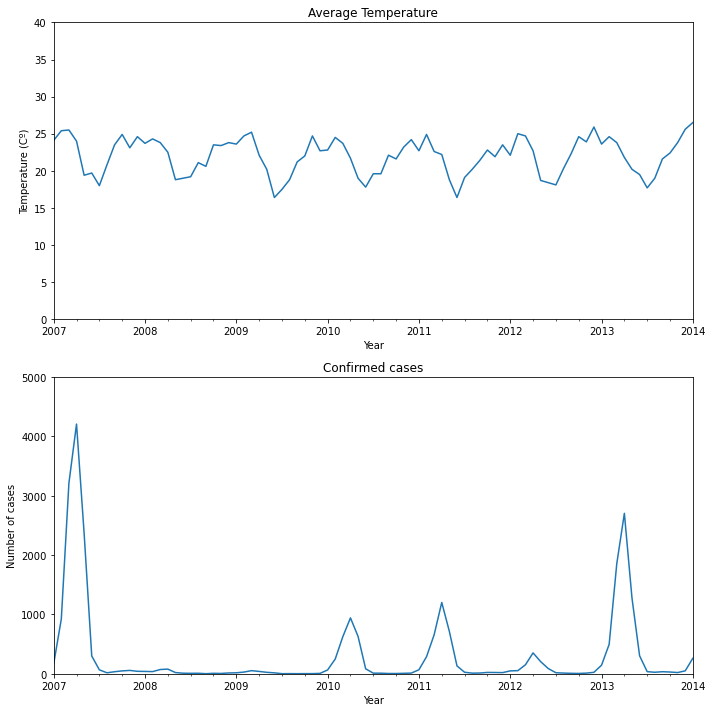

In [298]:
fig,(ax2,ax3) = plt.subplots(
    ncols=1,
    nrows=2,
    figsize=(10,10),
    dpi=72
    )

fig.set(tight_layout=True);

# Average temperature line plot
df.loc['2007-01-01':'2014-01-01','temperatura-media'].plot(kind='line',ax=ax2);


ax2.set_ylim([0,40])
ax2.set(
    title="Average Temperature",
    xlabel="Year",
    ylabel="Temperature (Cº)"
);

# Number of cases line plot
df.loc['2007-01-01':'2014-01-01','casos-confirmados'].plot(kind='line',ax=ax3);
ax3.set_ylim(0,5000)
ax3.set(
    title="Confirmed cases",
    xlabel="Year",
    ylabel="Number of cases"
);

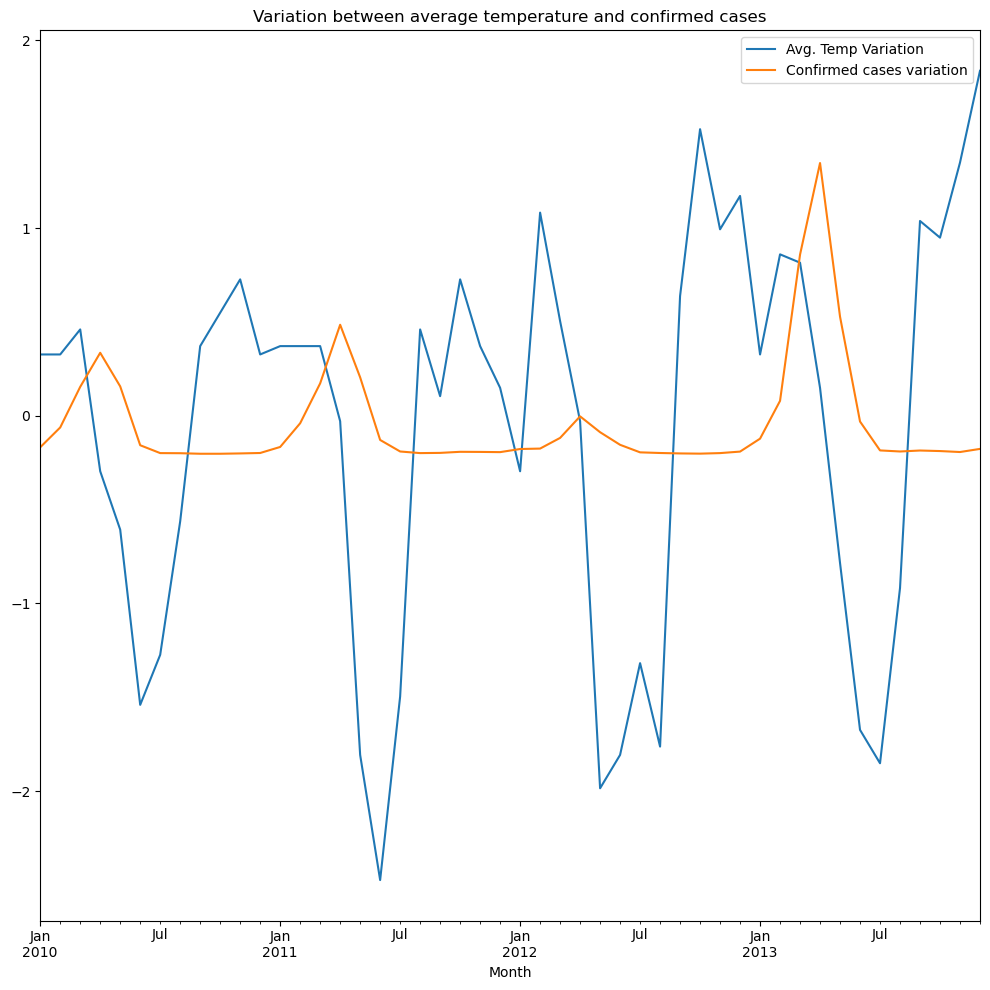

In [299]:
df_norm = (df-df.mean())/df.std()

# Multiple plots 
fig,ax4 = plt.subplots(
    figsize=(10,10)
)
fig.set(
    tight_layout=True
)

df_norm.loc['2010-01-01':'2013-12-31','temperatura-maxima'].plot(kind='line',ax=ax4);
df_norm.loc['2010-01-01':'2013-12-31','casos-confirmados'].plot(kind='line',ax=ax4);

ax4.set(
    title="Variation between average temperature and confirmed cases",
    xlabel="Month"
);
ax4.legend(
    ['Avg. Temp Variation','Confirmed cases variation'],
    loc='best'
    );

